# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[23 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

In [2]:
df_creditcard = pd.read_csv('creditcard.csv')
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
X = df_creditcard.drop("Class", axis=1)
y = df_creditcard["Class"]

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [5]:
df_creditcard.drop_duplicates()
df_creditcard.shape

(284807, 31)

*ISOLATION FOREST*


In [6]:
iso_model = IsolationForest(contamination=0.1, random_state=42)
iso_model.fit(X_train)

train_iso_predictions = iso_model.predict(X_train)
test_iso_predictions = iso_model.predict(X_test)
train_iso_anomalies = np.where(train_iso_predictions == -1, 1, 0)
test_iso_anomalies = np.where(test_iso_predictions == -1, 1, 0)

print(f"Detected anomalies in training set: {np.sum(train_iso_anomalies)}")
print(f"Detected anomalies in test set: {np.sum(test_iso_anomalies)}")

print("Training Data Classification Report:")
print(classification_report(y_train, train_iso_anomalies))
print("Test Data Classification Report:")
print(classification_report(y_test, test_iso_anomalies))

Detected anomalies in training set: 21361
Detected anomalies in test set: 7038
Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    213226
           1       0.02      0.86      0.03       379

    accuracy                           0.90    213605
   macro avg       0.51      0.88      0.49    213605
weighted avg       1.00      0.90      0.95    213605

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71089
           1       0.01      0.89      0.03       113

    accuracy                           0.90     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.90      0.95     71202



C:\Users\User\AppData\Local\Temp\ipykernel_15084\3092012477.py:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[test_iso_anomalies == 0, 0], X_test[test_iso_anomalies == 0, 1],


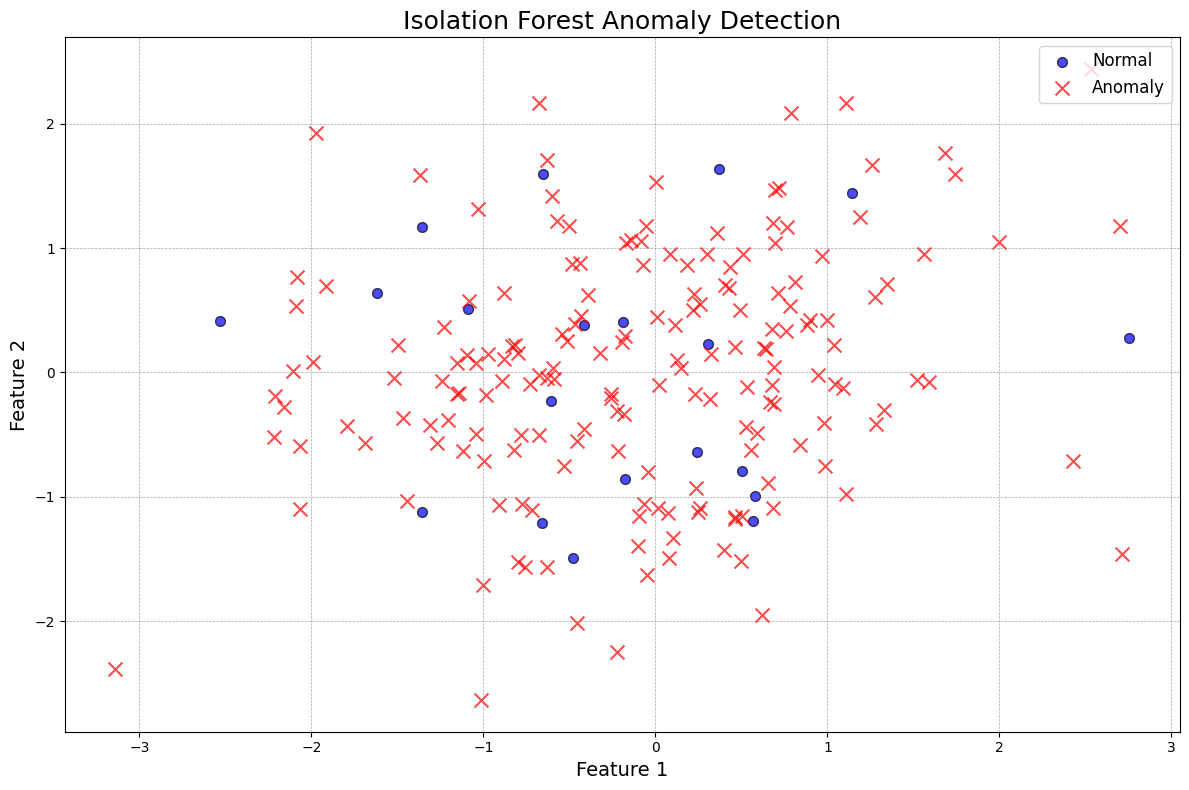

In [ ]:
plt.figure(figsize=(12, 8)) 
plt.title("Isolation Forest Anomaly Detection", fontsize=18)

plt.scatter(X_test[test_iso_anomalies == 1, 0], X_test[test_iso_anomalies == 1, 1], 
            c='blue', label='Normal', edgecolor='k', s=50, alpha=0.7, marker='o') 

plt.scatter(X_test[test_iso_anomalies == 0, 0], X_test[test_iso_anomalies == 0, 1], 
            c='red', label='Anomaly', edgecolor='k', s=100, alpha=0.7, marker='x') 

plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

*ONE-CLASS SVM*

In [7]:
svm_model = OneClassSVM(kernel='linear', gamma=0.01, nu=0.01)
svm_model.fit(X_train)

train_svm_predictions = svm_model.predict(X_train)
test_svm_predictions = svm_model.predict(X_test)
train_svm_anomalies = np.where(train_svm_predictions == -1, 1, 0)
test_svm_anomalies= np.where(test_svm_predictions == -1, 1, 0)

print(f"Detected anomalies in training set: {np.sum(train_svm_anomalies)}")
print(f"Detected anomalies in test set: {np.sum(test_svm_anomalies)}")

print("Training Data Classification Report:")
print(classification_report(y_train, train_svm_anomalies))
print("Test Data Classification Report:")
print(classification_report(y_test, test_svm_anomalies))

Detected anomalies in training set: 196783
Detected anomalies in test set: 65573
Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.08      0.14    213226
           1       0.00      0.35      0.00       379

    accuracy                           0.08    213605
   macro avg       0.49      0.21      0.07    213605
weighted avg       0.98      0.08      0.14    213605

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.08      0.14     71089
           1       0.00      0.32      0.00       113

    accuracy                           0.08     71202
   macro avg       0.49      0.20      0.07     71202
weighted avg       0.98      0.08      0.14     71202



C:\Users\User\AppData\Local\Temp\ipykernel_15084\2473670721.py:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[test_svm_anomalies == 0, 0], X_test[test_svm_anomalies == 0, 1],


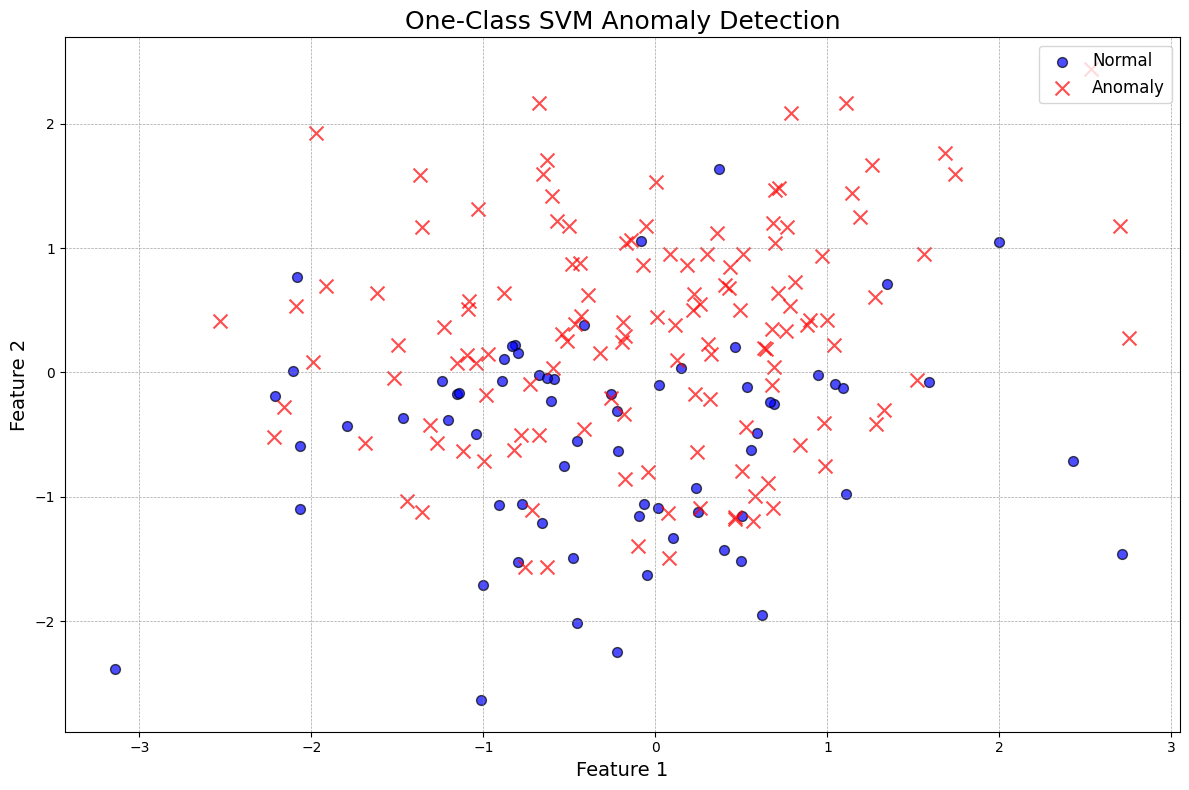

In [ ]:
plt.figure(figsize=(12, 8)) 
plt.title("One-Class SVM Anomaly Detection", fontsize=18)

plt.scatter(X_test[test_svm_anomalies == 1, 0], X_test[test_svm_anomalies == 1, 1], 
            c='blue', label='Normal', edgecolor='k', s=50, alpha=0.7, marker='o') 

plt.scatter(X_test[test_svm_anomalies == 0, 0], X_test[test_svm_anomalies == 0, 1], 
            c='red', label='Anomaly', edgecolor='k', s=100, alpha=0.7, marker='x') 

plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

*LOCAL OUTLINER FACTOR*

In [8]:
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

train_lof_predictions = lof_model.fit_predict(X_train)
test_lof_predictions = lof_model.fit_predict(X_test)

train_anomalies_lof = np.where(train_lof_predictions == -1, 1, 0)
test_anomalies_lof = np.where(test_lof_predictions == -1, 1, 0)

print(f"Detected anomalies in training set: {np.sum(train_anomalies_lof)}")
print(f"Detected anomalies in test set: {np.sum(test_anomalies_lof)}")

print("Training Data Classification Report:")
print(classification_report(y_train, train_anomalies_lof))
print("Test Data Classification Report:")
print(classification_report(y_test, test_anomalies_lof))

Detected anomalies in training set: 21361
Detected anomalies in test set: 7121
Training Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    213226
           1       0.00      0.15      0.01       379

    accuracy                           0.90    213605
   macro avg       0.50      0.52      0.48    213605
weighted avg       1.00      0.90      0.94    213605

Test Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71089
           1       0.00      0.20      0.01       113

    accuracy                           0.90     71202
   macro avg       0.50      0.55      0.48     71202
weighted avg       1.00      0.90      0.95     71202



C:\Users\User\AppData\Local\Temp\ipykernel_15084\3662877503.py:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[test_lof_predictions == -1, 0], X_test[test_lof_predictions == -1, 1],


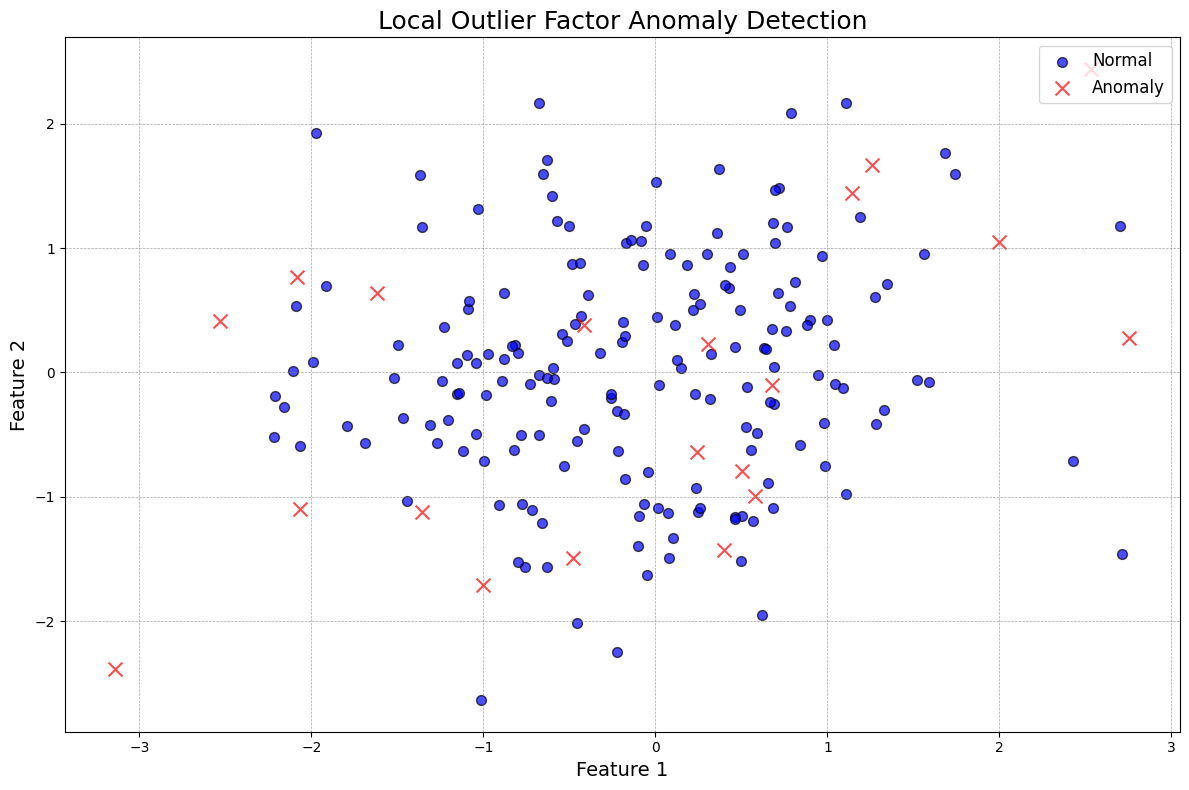

In [ ]:
plt.figure(figsize=(12, 8)) 
plt.title("Local Outlier Factor Anomaly Detection", fontsize=18)

plt.scatter(X_test[test_lof_predictions == 1, 0], X_test[test_lof_predictions == 1, 1], 
            c='blue', label='Normal', edgecolor='k', s=50, alpha=0.7, marker='o')

plt.scatter(X_test[test_lof_predictions == -1, 0], X_test[test_lof_predictions == -1, 1], 
            c='red', label='Anomaly', edgecolor='k', s=100, alpha=0.7, marker='x')

plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout() 
plt.show()

Epoch [1/20], Loss: 1.5122
Epoch [2/20], Loss: 1.1061
Epoch [3/20], Loss: 0.8524
Epoch [4/20], Loss: 0.8293
Epoch [5/20], Loss: 1.0162
Epoch [6/20], Loss: 0.9507
Epoch [7/20], Loss: 0.9528
Epoch [8/20], Loss: 0.7690
Epoch [9/20], Loss: 0.7895
Epoch [10/20], Loss: 0.9669
Epoch [11/20], Loss: 0.9261
Epoch [12/20], Loss: 0.6802
Epoch [13/20], Loss: 0.9167
Epoch [14/20], Loss: 0.9652
Epoch [15/20], Loss: 0.9421
Epoch [16/20], Loss: 0.8546
Epoch [17/20], Loss: 0.8852
Epoch [18/20], Loss: 1.0089
Epoch [19/20], Loss: 0.7287
Epoch [20/20], Loss: 1.1819
              precision    recall  f1-score   support

      Normal       0.55      0.94      0.69       111
     Anomaly       0.30      0.03      0.06        89

    accuracy                           0.54       200
   macro avg       0.42      0.49      0.38       200
weighted avg       0.44      0.54      0.41       200



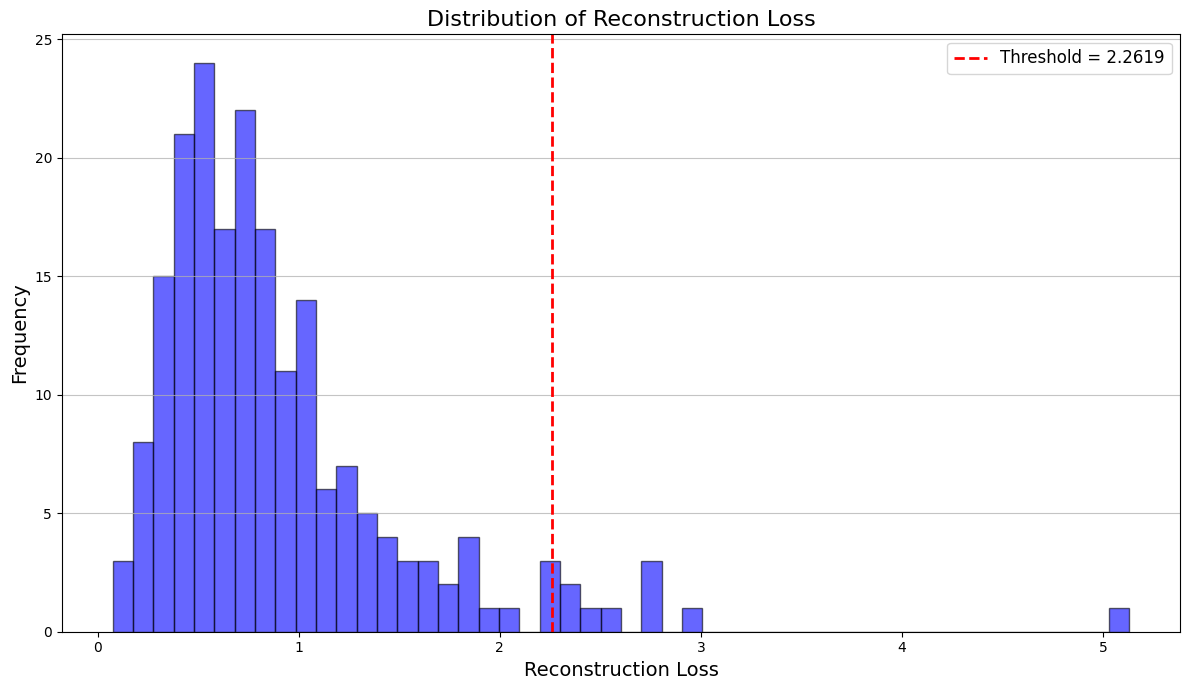

In [38]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

class MyAutoencoder(nn.Module):
    def __init__(self, input_dimension):
        super(MyAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dimension, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dimension),
            nn.Sigmoid()  
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dimension = X_train.shape[1]
autoencoder_model = MyAutoencoder(input_dimension)
loss_function = nn.MSELoss()
optimizer = optim.Adam(autoencoder_model.parameters(), lr=0.001)
num_epochs = 20
batch_size = 64
train_data = torch.utils.data.TensorDataset(X_train_tensor)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for batch in train_loader:
        inputs = batch[0]
    
        outputs = autoencoder_model(inputs)
        loss = loss_function(outputs, inputs) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    reconstructed_data = autoencoder_model(X_test_tensor)
    reconstruction_error = torch.mean((reconstructed_data - X_test_tensor) ** 2, dim=1)

threshold = np.percentile(reconstruction_error.numpy(), 95)
predictions = (reconstruction_error.numpy() > threshold).astype(int)
print(classification_report(y_test, predictions, target_names=['Normal', 'Anomaly']))


plt.figure(figsize=(12, 7))
plt.hist(reconstruction_error.numpy(), bins=50, alpha=0.6, color='blue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold:.4f}')
plt.title('Distribution of Reconstruction Loss', fontsize=16)
plt.xlabel('Reconstruction Loss', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.legend(fontsize=12)
plt.tight_layout()  
plt.show()


In [39]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, reconstruction_error.numpy())
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Threshold: {best_threshold:.4f}')

y_pred_test_ae = (reconstruction_error.numpy() > best_threshold).astype(int)
precision_ae = precision_score(y_test, y_pred_test_ae)
recall_ae = recall_score(y_test, y_pred_test_ae)
f1_ae = f1_score(y_test, y_pred_test_ae)

print(f'Precision: {precision_ae:.4f}')
print(f'Recall: {recall_ae:.4f}')
print(f'F1-Score: {f1_ae:.4f}')

Threshold: 0.0742
Precision: 0.4422
Recall: 0.9888
F1-Score: 0.6111


*ВИСНОВОК* 

ДАТАСЕТ занадто великий, тому не заливала на гіт

1. Isolation Forest
Виявлені аномалії: 21,361 у навчальній вибірці та 7,038 у тестовій.
Класифікаційний звіт:
Точність (precision) для класу нормальних значень (0) висока (1.00), що вказує на те, що більшість нормальних прикладів правильно класифіковано.
Навпаки, точність для аномалій (1) дуже низька (0.02), хоча повнота (recall) досягає 0.86, що означає, що більша частина аномалій була правильно ідентифікована.
Загальна точність моделі становить 90%, проте низька точність для аномалій вказує на можливі проблеми з незбалансованими даними.

2. One-Class SVM
Виявлені аномалії: 196,783 у навчальній вибірці та 65,573 у тестовій.
Класифікаційний звіт:
Модель показує дуже низьку точність (0.00) для аномалій, а повнота досягає лише 0.35 у навчальній вибірці та 0.32 у тестовій. Це свідчить про те, що модель погано розрізняє аномалії.
Загальна точність становить лише 8%, що робить цей метод неефективним для цього завдання.

3. Local Outlier Factor
Виявлені аномалії: 21,361 у навчальній вибірці та 7,121 у тестовій.
Класифікаційний звіт:
Точність для нормальних значень залишається високою (1.00), але точність для аномалій знову вкрай низька (0.00).
Модель показує 90% загальної точності, але це пов'язано з поганою ідентифікацією аномалій (повнота всього 0.15).

4. Автоенкодер
Втрата (Loss) зменшується протягом навчання, але спостерігаються коливання між епохами, що може вказувати на складність завдання.
Класифікаційний звіт:
Точність для нормальних значень (0.55) і аномалій (0.30) свідчить про те, що автоенкодер також зазнає труднощів з ідентифікацією аномалій.
Повнота для аномалій дуже низька (0.03), що означає, що модель пропускає більшість аномалій.

5. Порогові значення
Поріг для детекції аномалій установлено на рівні 0.0742, що забезпечує високу повноту (0.9888) і адекватну точність (0.4422). Це вказує на те, що за такого порогу модель буде захоплювати більшість аномалій, але можливі також помилкові спрацьовування.
Загальний висновок


Метод Isolation Forest показав найкращі результати серед усіх тестованих методів, незважаючи на низьку точність класифікації аномалій. One-Class SVM і Local Outlier Factor показали низькі показники точності та повноти. Автоенкодер, незважаючи на деяке зниження втрат, також зазнає труднощів в ідентифікації аномалій.
Для поліпшення результатів, можливо, варто розглянути балансування даних, зміну гіперпараметрів і застосування більш складних архітектур моделі або методів ансамблювання.